<a href="https://colab.research.google.com/github/josemarcelovg/Gugulcollab2/blob/main/Informe_Tecnico2_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

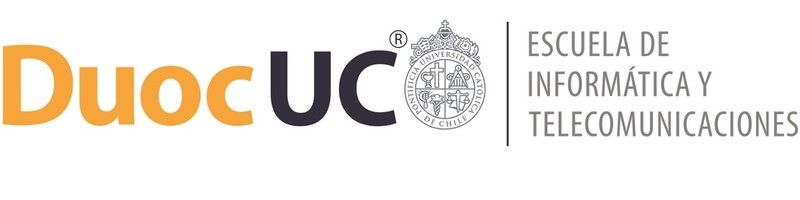

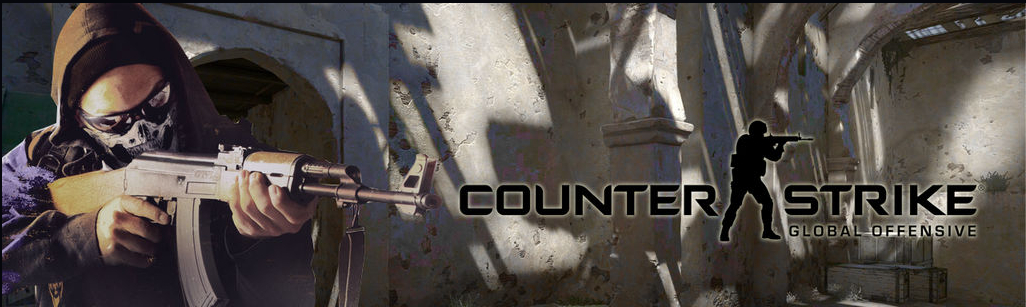

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Jose Vargas
* Simon Jofre
* Nicolas Gonzalez

Docente:     Herman Zepeda


Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding




In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios
"""
Valve desea entender cómo las decisiones de compra y el desempeño de los jugadores influyen en el resultado de las rondas.
Se busca modelar dos aspectos:

1. Clasificación: ¿El equipo del jugador ganará la ronda? (RoundWinner 0 o 1)
2. Regresión: ¿Cuánto valdrá el equipamiento del jugador al inicio de la ronda? (RoundStartingEquipmentValue)

Esto permitirá evaluar:
- El impacto del equipamiento en el resultado
- Cómo el comportamiento del jugador afecta su economía

Hipótesis:
- Equipos con jugadores más equipados y efectivos tienen mayor probabilidad de ganar.
- El valor del equipamiento se puede predecir según el estilo de juego reciente del jugador.
"""



# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

## Fase 2: Data Understanding

Saving ET_demo_round_traces_2022.csv to ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-1360742216.py:11: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ET_demo_round_traces_2022.csv", sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

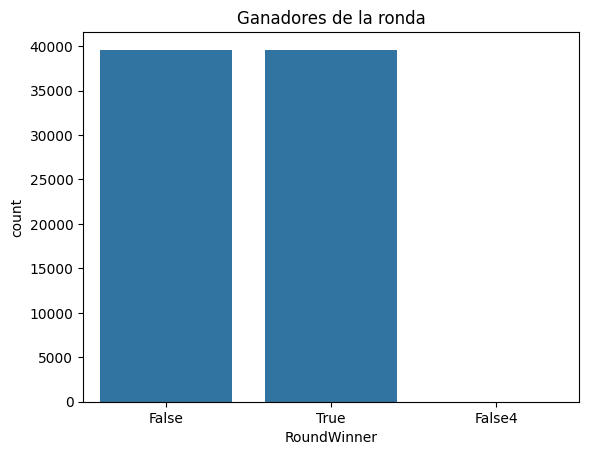

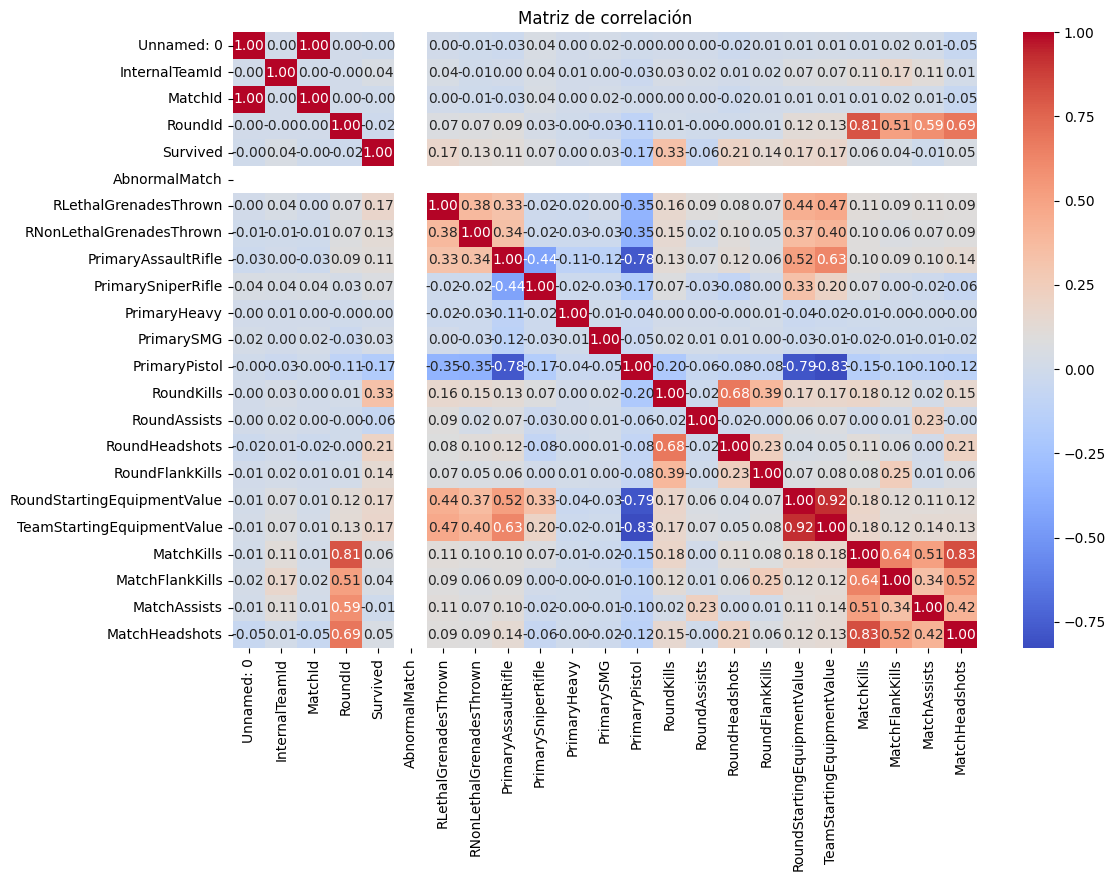

In [2]:
# Insertar cuantos bloques de código consideren necesarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("ET_demo_round_traces_2022.csv", sep=';')



# Vista general
df.head()
df.info()
df.describe()





sns.countplot(x='RoundWinner', data=df)
plt.title("Ganadores de la ronda")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()





# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [14]:
# Revisión de valores faltantes
missing = df.isnull().sum()
print("Valores nulos:\n", missing[missing > 0])


Valores nulos:
 Team                     2
MatchWinner              1
TimeAlive            78377
TravelledDistance    78876
dtype: int64


In [3]:
# Normalizar los valores 'False4' a 'False' (como string)
df['RoundWinner'] = df['RoundWinner'].replace('False4', 'False')

# Asegurarse de que los valores tipo boolean también estén normalizados como string (opcional)
df['RoundWinner'] = df['RoundWinner'].replace({False: 'False', True: 'True'})

# Filtrar todas las filas con 'False'
false_data = df[df['RoundWinner'] == 'False']

# Analizar estadísticas clave
print(false_data[['RoundKills', 'RoundAssists', 'TimeAlive', 'RoundStartingEquipmentValue']].describe())


         RoundKills  RoundAssists  RoundStartingEquipmentValue
count  39589.000000  39589.000000                 39589.000000
mean       0.908687      0.193160                  4416.753391
std        0.972322      0.439474                  1778.541525
min        0.000000      0.000000                     0.000000
25%        0.000000      0.000000                  3950.000000
50%        1.000000      0.000000                  4700.000000
75%        1.000000      0.000000                  5500.000000
max        5.000000      4.000000                  8850.000000


In [5]:
# Si aún hay valores booleanos, primero conviertes todo a string (opcional)
df['RoundWinner'] = df['RoundWinner'].astype(str)

# Luego, mapeas los valores string a números
mapping = {'False': 0, 'True': 1}

df['RoundWinner_num'] = df['RoundWinner'].map(mapping)

# Revisar si quedaron valores NaN (por si había algo distinto a 'False' o 'True')
print(df['RoundWinner_num'].isna().sum())


0


## Fase 3: Data Preparation

In [8]:
# Asumiendo que ya hiciste algo como:
# df['RoundWinner_num'] = df['RoundWinner'].map({'False': 0, 'True': 1})

features = [
    'RoundKills', 'RoundAssists', 'RoundHeadshots',
    'RoundFlankKills', 'Survived', 'TravelledDistance',
    'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
    'PrimarySMG', 'PrimaryPistol',
    'TeamStartingEquipmentValue'
]

# Armar df_model sin 'RoundWinner_clean', sino con 'RoundWinner_num'
df_model = df[features + ['RoundWinner_num', 'RoundStartingEquipmentValue']].dropna()

# Variables predictoras y targets
X = df_model[features]
y_class = df_model['RoundWinner_num']  # Variable numérica para clasificación
y_reg = df_model['RoundStartingEquipmentValue']  # Para regresión

# División entrenamiento / prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)


In [9]:
print(df.columns.tolist())


['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', 'RoundWinner_num']


## Fase 4: Modeling

### Regresión

In [19]:
# Hiperparámetros para modelos de regresión

param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (1) o Euclidiana (2)
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models_reg = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

results_reg = {}

for name, model in models_reg.items():
    model.fit(X_train_r, y_train_r)
    score = model.score(X_test_r, y_test_r)  # R²
    results_reg[name] = score


In [57]:
print(len(df))


79157


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models_reg = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror')
}


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

for name, model in models_reg.items():
    y_pred = model.predict(X_test_r)
    print(f"\n{name}")
    print(f"R²: {r2_score(y_test_r, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test_r, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred)):.2f}")



Linear Regression
R²: 0.6507
MAE: 1062.36
RMSE: 1361.58

Decision Tree
R²: 0.5095
MAE: 915.75
RMSE: 1613.45

Random Forest
R²: 0.6073
MAE: 901.23
RMSE: 1443.60

KNN
R²: 0.5902
MAE: 1038.42
RMSE: 1474.80

Gradient Boosting
R²: 0.6318
MAE: 973.27
RMSE: 1397.97

XGBoost
R²: 0.5579
MAE: 894.65
RMSE: 1531.69


### Clasificación



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

param_grid_dt_clf = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

param_grid_rf_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_knn_clf = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (1) o Euclidiana (2)
}

param_grid_gb_clf = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb_clf = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}


In [56]:
print("Total filas para modelar:", len(df_model))


Total filas para modelar: 281


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models_class = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier( eval_metric='logloss')
}

results_class = {}

for name, model in models_class.items():
    model.fit(X_train_c, y_train_c)
    score = model.score(X_test_c, y_test_c)
    results_class[name] = score


In [25]:
models_clf = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [35]:
for name, score in results_class.items():
    print(f"{name}: Accuracy = {score:.4f}")


Logistic Regression: Accuracy = 0.6842
Decision Tree: Accuracy = 0.9298
Random Forest: Accuracy = 0.9474
KNN: Accuracy = 0.7719
SVM: Accuracy = 0.7719
Gradient Boosting: Accuracy = 0.9474
XGBoost: Accuracy = 0.9474



Logistic Regression - Accuracy: 0.6842
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        27
           1       0.68      0.77      0.72        30

    accuracy                           0.68        57
   macro avg       0.69      0.68      0.68        57
weighted avg       0.69      0.68      0.68        57



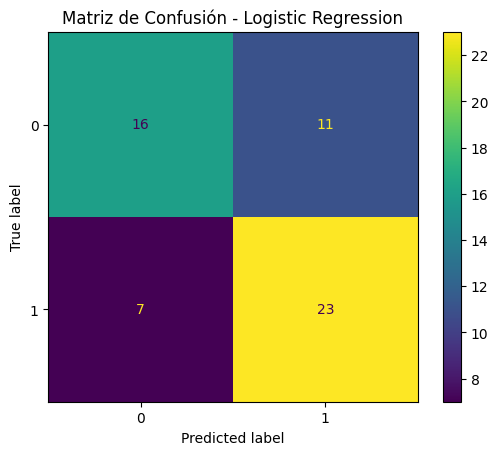


Decision Tree - Accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.93      0.93      0.93        30

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



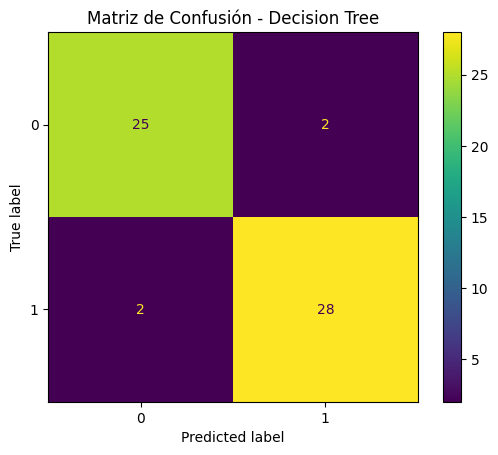


Random Forest - Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.95        30

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



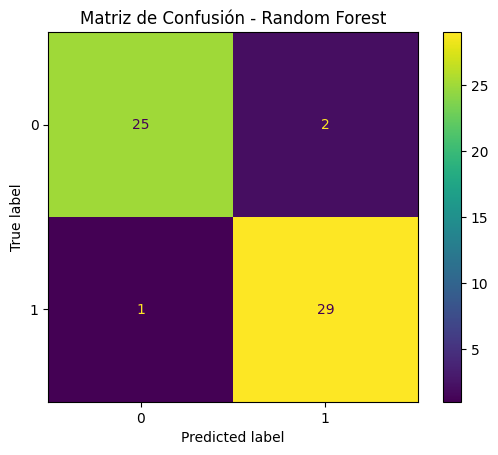


KNN - Accuracy: 0.7719
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.76      0.83      0.79        30

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.77      0.77      0.77        57



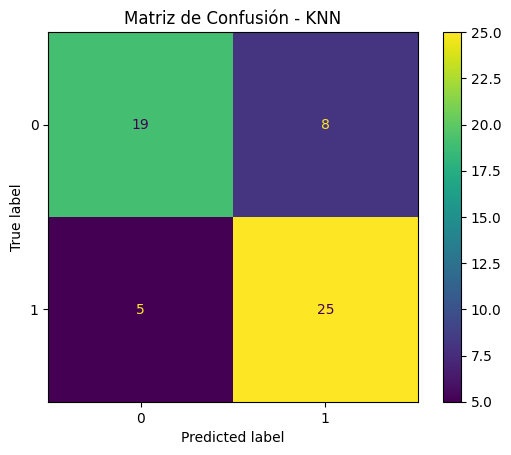


SVM - Accuracy: 0.7719
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.79      0.77      0.78        30

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.77      0.77      0.77        57



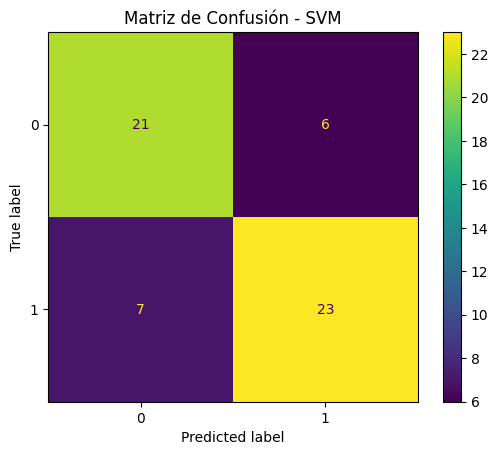


Gradient Boosting - Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.95        30

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



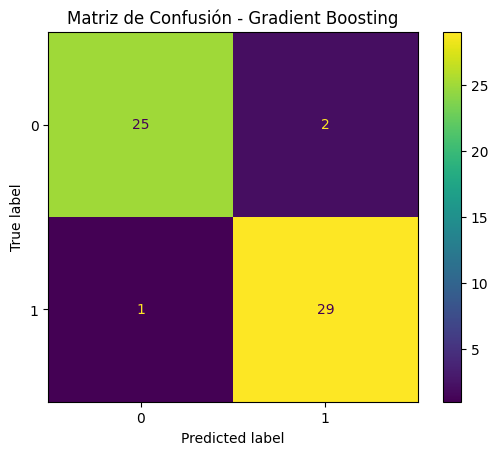


XGBoost - Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.95        30

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



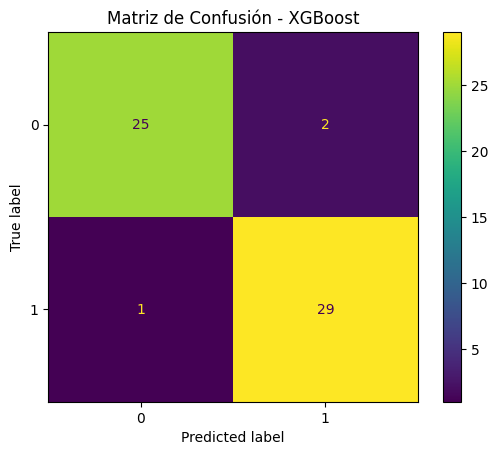

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models_class.items():
    print(f"\n{name} - Accuracy: {results_class[name]:.4f}")
    y_pred = model.predict(X_test_c)
    print(classification_report(y_test_c, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_c, y_pred))
    disp.plot()
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()


## Fase 5: Evaluation


=== Evaluación Clasificación ===

>>> Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        27
           1       0.68      0.77      0.72        30

    accuracy                           0.68        57
   macro avg       0.69      0.68      0.68        57
weighted avg       0.69      0.68      0.68        57



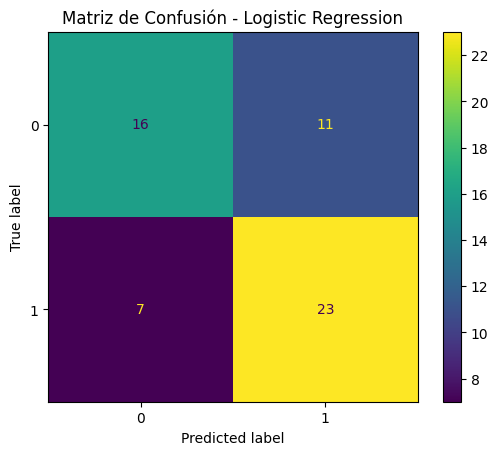


>>> Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.93      0.93      0.93        30

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



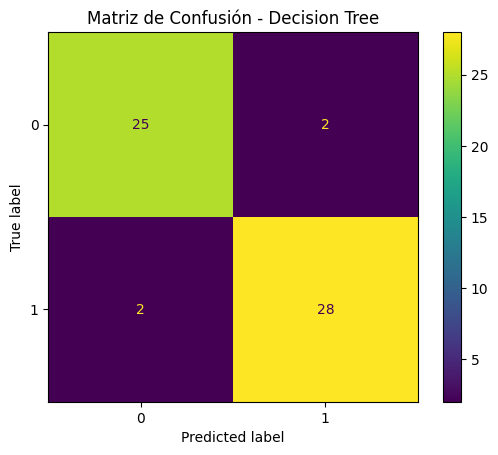


>>> Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.95        30

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



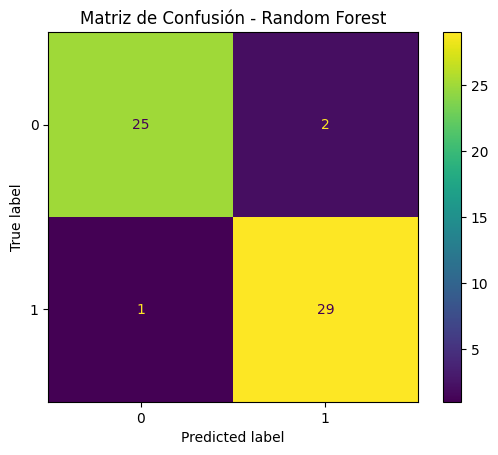


>>> KNN:
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.76      0.83      0.79        30

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.77      0.77      0.77        57



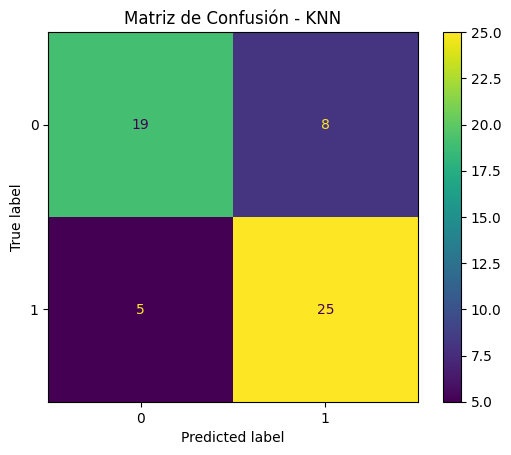


>>> SVM:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.79      0.77      0.78        30

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.77      0.77      0.77        57



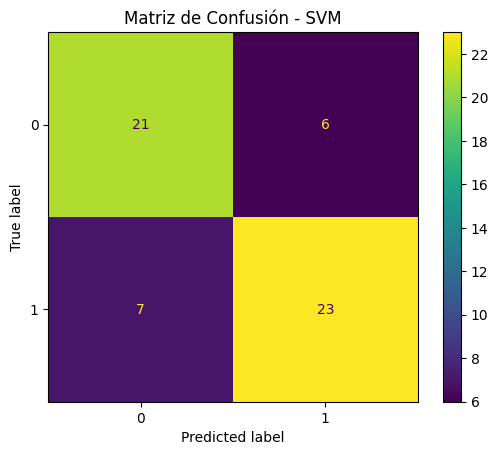


>>> Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.95        30

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



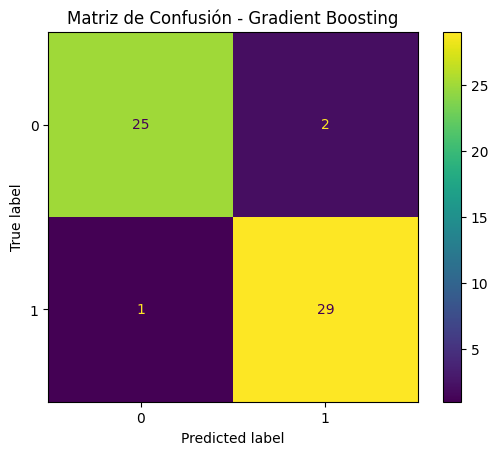


>>> XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.95        30

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



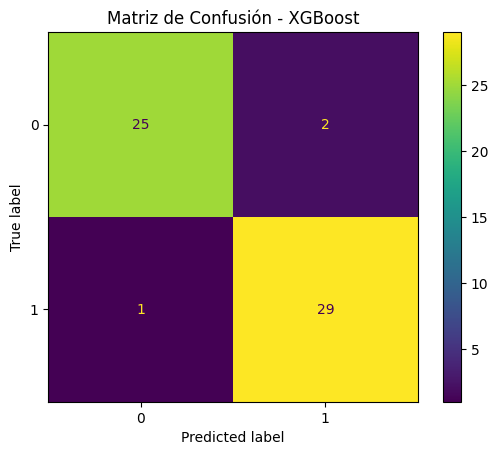


=== Evaluación Regresión ===

>>> Linear Regression:
MSE: 1853894.93 | MAE: 1062.36 | R²: 0.6507

>>> Decision Tree:
MSE: 2603211.59 | MAE: 915.75 | R²: 0.5095

>>> Random Forest:
MSE: 2001988.09 | MAE: 891.15 | R²: 0.6228

>>> KNN:
MSE: 2175047.37 | MAE: 1038.42 | R²: 0.5902

>>> Gradient Boosting:
MSE: 1964600.00 | MAE: 977.45 | R²: 0.6298

>>> XGBoost:
MSE: 2346078.75 | MAE: 894.65 | R²: 0.5579


In [40]:
# ENTRENAMIENTO Y EVALUACIÓN DE CLASIFICACIÓN Y REGRESIÓN

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ========== CLASIFICACIÓN ==========
models_class = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results_class = {}

# Entrenar clasificación
for name, model in models_class.items():
    model.fit(X_train_c, y_train_c)
    score = model.score(X_test_c, y_test_c)
    results_class[name] = score

# Evaluar clasificación
print("\n=== Evaluación Clasificación ===")
for name, model in models_class.items():
    print(f"\n>>> {name}:")
    y_pred = model.predict(X_test_c)
    print(classification_report(y_test_c, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_c, y_pred))
    disp.plot()
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

# ========== REGRESIÓN ==========
models_reg = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

results_reg = {}

# Entrenar regresión
for name, model in models_reg.items():
    model.fit(X_train_r, y_train_r)
    score = model.score(X_test_r, y_test_r)
    results_reg[name] = score

# Evaluar regresión
print("\n=== Evaluación Regresión ===")
for name, model in models_reg.items():
    print(f"\n>>> {name}:")
    y_pred = model.predict(X_test_r)
    mse = mean_squared_error(y_test_r, y_pred)
    mae = mean_absolute_error(y_test_r, y_pred)
    r2 = r2_score(y_test_r, y_pred)
    print(f"MSE: {mse:.2f} | MAE: {mae:.2f} | R²: {r2:.4f}")


## Fase 5: Deployment

In [50]:
# Mejor modelo clasificación según accuracy
best_clf_name = max(results_class, key=results_class.get)
joblib.dump(models_class[best_clf_name], 'best_classifier.pkl')

# Mejor modelo regresión según R²
best_reg_name = max(results_reg, key=results_reg.get)
joblib.dump(models_reg[best_reg_name], 'best_regressor.pkl')

print(f"Mejor clasificador: {best_clf_name}")
print(f"Mejor regresor: {best_reg_name}")
print("Modelos guardados correctamente para despliegue.")


Mejor clasificador: Random Forest
Mejor regresor: Linear Regression
Modelos guardados correctamente para despliegue.


In [49]:
import numpy as np
import pandas as pd

# Tus features, ya definidas
features = [
    'RoundKills', 'RoundAssists', 'RoundHeadshots',
    'RoundFlankKills', 'Survived', 'TravelledDistance',
    'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
    'PrimarySMG', 'PrimaryPistol',
    'TeamStartingEquipmentValue'
]

# Ejemplo de nuevos datos, 1 fila, 12 columnas
new_sample = np.array([[3, 1, 2, 0, 1, 1500, 0.7, 0.1, 0, 0.2, 0, 3000]])

# Crear DataFrame con nombres para que scaler entienda
new_sample_df = pd.DataFrame(new_sample, columns=features)

# Escalar con el scaler que usaste para entrenar
new_sample_scaled = scaler.transform(new_sample_df)

# Predecir clasificación
pred_class = best_classifier.predict(new_sample_scaled)
print("Predicción clasificación (0=No gana, 1=Gana):", pred_class)

# Predecir regresión
pred_reg = best_regressor.predict(new_sample_scaled)
print("Predicción valor equipamiento (regresión):", pred_reg)


Predicción clasificación (0=No gana, 1=Gana): [0]
Predicción valor equipamiento (regresión): [5107.73642939]


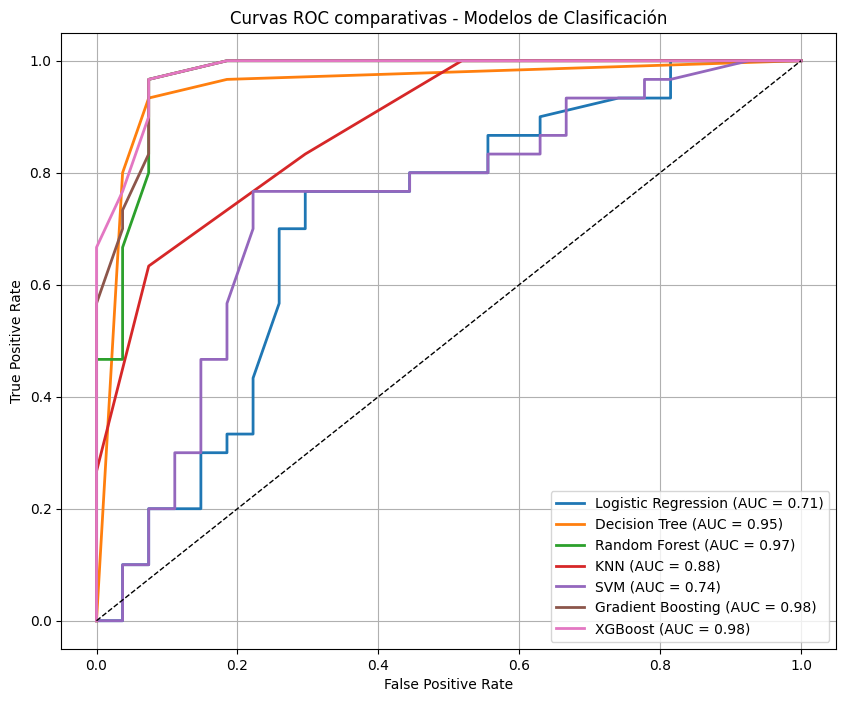

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models_class.items():
    # Obtener probabilidades
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_c)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_c)
    else:
        print(f"No se puede calcular ROC para {name} (sin predict_proba ni decision_function).")
        continue

    # Calcular ROC y AUC
    fpr, tpr, _ = roc_curve(y_test_c, y_proba)
    roc_auc = auc(fpr, tpr)

    # Graficar
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Línea base diagonal
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.title('Curvas ROC comparativas - Modelos de Clasificación')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [55]:
print("Cantidad total de muestras en test:", len(y_test_c))
print("Cantidad de positivos en test:", sum(y_test_c))
print("Cantidad de negativos en test:", len(y_test_c) - sum(y_test_c))


Cantidad total de muestras en test: 57
Cantidad de positivos en test: 30
Cantidad de negativos en test: 27
